# Data Permanance through Relational Databases

Relational databases are a system for storing data in a way that allows user to rapidly recall data. Databases and databases are a complicated topic that entire careers can be built off of. The goal of this document, is to provide you a brief introduction to databases to explain the differences between spreadsheet software and provide a high level overview of databases.

More detailed information on databases is available at the following resources:

[CMU's Online Relational Database Course](https://www.youtube.com/watch?v=uikbtpVZS2s&list=PLSE8ODhjZXjaKScG3l0nuOiDTTqpfnWFf)

[Ready to use Database Models](https://dba.stackexchange.com/questions/12991/ready-to-use-database-models-example/23831#23831)

[PostgreSQL's Documentation](https://www.postgresql.org/docs/)

[SQLite Documentation](https://www.sqlite.org/docs.html)

## Types of Database Systems

Most experienced windows users are probably most familiar with either MS Access or MS SQL Server. The common link between the majority of relational databases is their use of SQL (usually prounced sequel or S-Q-L). There can be different Dialects of the SQL, but the general syntax stays fairly consistent amoung all the systems. Think of it like British vs. American vs. Australian English. From a general standpoint, learning any of them, will teach you the majority of how to interact with most of them. The exception to this would be "NoSQL" or "Document" databases like [MongoDB.](https://www.mongodb.com/docs/)

[Free introductory course on SQL.](https://www.datacamp.com/courses/introduction-to-sql)

For the remainder of the document, I'm going to focus on SQLite. SQLite is public domain, and as such is free and you're basically authorized to do anything with it, modify it, embed it in applications, sell solutions utilizing it to clients, whatever. There will be times when other database systems are necessary, some may be more performant, or include better user interfaces, you've probably heard of SQL Server and Oracle being used at MB. 

One thing to note is that SQLite is a "single file" database. Generally the convention is to create a file with either the `.sqlite`, `.db` or `.db3` file extension, however if you're making a database of bookmarks, a `.bookmark` extension might make sense and is perfectly acceptable to use. SQLite will work with any file extension.

The other major consideration is how you'll be distributing access to the database to users. SQLite generally doesn't get configured with much in the way of authentication, access to the database is generally determined by a user's file permission settings to the actual file. That generally means a user with read permissions could copy out the file and modify it on their own device or in a folder where they have write permissions. Many databases are intended to be run on a server, and provide more "robust" authentication, like PostgreSQL, MySQL, Oracle, or MS SQL Server, and as such will expect applications to connect to the server/DB via some form of authenticated connection, and either pass SQL directly to the server, or execute supporing code on the server to retrieve the necessary information and return it to the user.

All of these plus licensing requirements factor into your selection of a database system. Since SQLite is public domain, it's included in python as a built in package, which is why we're demonstrating it here, there's nothing required on the user's end as far as installing drivers or creating a server environment, it's all built in and "just works". And it's generally considered one of the most "accessible" ways to get started with databases.

For server based applications I highly recommend utilizing [PostgreSQL](https://www.postgresql.org/download/) or [MySQL](https://www.mysql.com/). It avoids a lot of the licensing and distribution issues that come along with Oracle or MS SQL Server. Drivers for interacting with any of these database systems tend to be readily available in exisiting python libraries.

## Key Points of Databases

The most fundamental unit of a database is it's tables, consisting of **fields** (columns) and **records** (rows). The biggest differentiator between a database and a spreadsheet, is that while spreadsheets contain the `VLOOKUP` function that can relate values of multiple tables together, databases contain significant built in algorithms and code to do the same kinds of tasks much faster. Following along with [the SQLite tutorial](https://docs.python.org/3/library/sqlite3.html), let's build a basic database.

## Importing the Libraries

In [1]:
# Create a Folder to house the database
from pathlib import Path
import sqlite3

## Create the Demo Folder

In [2]:
# Uncomment the following code to create unique user folders and databases
# p = Path("Replace with your initials").mkdir(parents=True, exist_ok=True)  # Creates a user folder
p = Path("DRP").mkdir(parents=True, exist_ok=True)  # Creates a user folder

## Creating the Database Connection

In [3]:
# Create the db file
# con = sqlite3.connect("replace with your initials/your initials.db")  # Creates a user DB
con = sqlite3.connect("DRP/DRP.db")  # Creates a user DB

## Creating a Database Cursor

Most databases allow you to interact with them via a command line interface from which you execute SQL statements. With SQLite in python, this can be done with a `cursor` object, like the cursor of a command line.

In [4]:
cur = con.cursor()

# Executing your First SQL Code

SQL is meant to be human readable, so the command to create a table named movies, with the columns `title`, `year`, and `score` is `CREATE TABLE movie(title, year, score)`.

In [53]:
cur.execute("CREATE TABLE movie(title, year, score)")

# Reviewing Your First Command

90% of the time you'll be working with databases at a more 'conceptual' level in the background of applications. But sometimes it's better to view the tables as tables. Lots of applications are available for interacting with sqlite databases, again due to it's public domain nature. [DB Browser for SQLite](https://sqlitebrowser.org/dl/) is a good standalone application, VSCode has an [extension](https://marketplace.visualstudio.com/items?itemName=alexcvzz.vscode-sqlite), [Pycharm Professional](https://www.jetbrains.com/help/pycharm/sqlite.html#-2cgod3_62) has a powerful sqlite interface, lastly [ODBC drivers can be installed](http://www.ch-werner.de/sqliteodbc/) for excel to query tables (there be dragons, get approval from IT for any of these).

<div class="alert alert-block alert-info">
<b>Tip:</b> Note that when using excel to query tables, you'll still be limited by Excel's row limit of 1,048,576. Most databases don't have such a restriction, so data in excess of this limitation will need to be filtered before being loaded into an excel file
</div>

Here's how to verify the table was created in python;

In [54]:
res = cur.execute("SELECT name FROM sqlite_master")  # Create a result object
res.fetchone()  # Return the first value of the result object

('RR_Accidents_dg_tmp',)

## Reviewing what Occured

SQLite has a default table, `sqlite_master`, that keeps track of all the tables within the database. Opening the sqlite in one of our database browsers shows that our newly created table `movie` is now included in the `sqlite_master` table. This is just one of the many things SQLite will do in the background to provide additional resources to the users.

Our verification SQL statment selected the values in the `name` column for all records contained within the `sqlite_master` table. Since there's only one table, `movie` that was the only result that returned from the SQL Query, you can also search for specific tables names using the `WHERE` command.

In [55]:
res = cur.execute("SELECT name FROM sqlite_master WHERE name='spam'")
print(res.fetchone())  # None because the table 'spam' doesn't exist

None


## Adding Data to a Table

The `INSERT INTO` command allows you to add data to a database. The data is included based on the order the columns were defined.

In [56]:
cur.execute(
    """
    INSERT INTO movie VALUES
        ('Monty Python and the Holy Grail', 1975, 8.2),
        ('And Now for Something Completely Different', 1971, 7.5)
"""
)

With the exception of the inital creation of databases and tables, changes to the database generally needed to be **committed**. This is done with the following command; 

In [57]:
con.commit()

Now verify that the data was added to the database;

In [60]:
res = cur.execute("SELECT score FROM movie")
res.fetchall()

[(8.2,), (7.5,), (7.9,), (7.5,), (8.0,)]

In [59]:
data = [
    ("Monty Python Live at the Hollywood Bowl", 1982, 7.9),
    ("Monty Python's The Meaning of Life", 1983, 7.5),
    ("Monty Python's Life of Brian", 1979, 8.0),
]
cur.executemany("INSERT INTO movie VALUES(?, ?, ?)", data)
con.commit()  # Remember to commit the transaction after executing INSERT.

In this example the `?` is shown being used as a placeholder to bind the data to the query. This is in order to prevent something called an SQL Injection attack. Basically, accepting raw input from a user in a string format is generally a bad idea, for example if I provide the user input below;

## SQL Injection Attacks

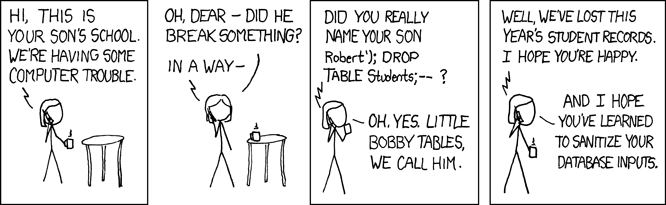

In [12]:
# "Monty Python and the Holy Grail", 1975, 8.2); DROP TABLE movie; --
user_input = input("Enter data to add to the database")

Enter data to add to the database "Monty Python and the Holy Grail", 1975, 8.2); DROP TABLE movie; --


In [13]:
data_string = "INSERT INTO movie VALUES({0})".format(user_input)
data_string

'INSERT INTO movie VALUES("Monty Python and the Holy Grail", 1975, 8.2); DROP TABLE movie; --)'

In [14]:
# Sqlite actually protects against this, you have to use the more dangerous execute script to get it to work
res = cur.executescript(data_string)
con.commit()

**Never trust raw user input**

# Rapidly Building Databases from Existing Data

Many Resources provide data in `.csv` format. These can be quickly loaded as tables of a database using pandas:

In [15]:
import pandas as pd

# //TODO - Move these files for the presentation
crossing_df = pd.read_csv(
    "C:\\Users\\Public\\PWDrive\\MBI\\DEV\\Railroad\\Reference\\FRA\\Data\\Crossings\\csv files\\OH_StateCrossingData.csv",
    low_memory=False,
)
crossing_df.to_sql("RR_Crossings", con, if_exists="replace", index=False)

10547

# Keys, Indexes and Types

The last major important concepts consistent amoung most databases are `keys`, `indexes` and `types`.

### Keys

Keys are basically how the data relates to the data within other tables. You've probably worked with keys with regard to things like `GUID`s or `USER_ID`, These are usually the `primary key` within the database that the remainder of your information is associated with. In the case of the railroad crossing table above, the randomly generated, unique `CrossingID` is the Primary key of the table.

The second type of key is a `foreign key` this means that the value realates to the primary key in another table. So for instance, [the FRA database for crossing accidents](https://data.transportation.gov/Railroads/Highway-Rail-Grade-Crossing-Accident-Data-Form-57-/7wn6-i5b9/about_data);

In [16]:
accidents_df = pd.read_csv(
    r"C:\Users\Public\PWDrive\MBI\DEV\Railroad\Reference\FRA\Data\Crossings\csv files\Accident Data.csv",
    low_memory=False,
)
accidents_df.to_sql("RR_Accidents", con, if_exists="replace", index=False)

246475

Contains a record for every highway-railroad crossing that has occured in the united states. The table contains a row `Grade Crossing ID` which would be the "Foreign Key" for the table `RR_Crossings`. Specifying this relationship makes it so it's impossible to submit an accident record to that database that isn't associated with a legitimate crossing ID.

### Indexes

Indexes convey relationships, typically between two sets of values. Think of this like the mapping between a county, and it's abbreviation, like `MRW`:`Morrow`.

### Types

## Utilizing Queries to Get and Visualize Data

In [17]:
res = cur.execute(
    """
SELECT "Railroad Code" FROM RR_Accidents WHERE "State Name"='OHIO'
"""
)

list_of_rrs = [row[0] for row in res.fetchall()]

In [18]:
# Get the counts of unique results
unique_dict = {}

for value in list_of_rrs:
    if value in unique_dict:
        unique_dict[value] += 1
    else:
        unique_dict[value] = 1

In [19]:
# Sort the Dictionary
sorted_dict = {
    k: v for k, v in sorted(unique_dict.items(), key=lambda item: item[1], reverse=True)
}

In [51]:
# Configure Matplotlib settings
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [30, 15]
matplotlib.rcParams.update({"font.size": 18})

<BarContainer object of 75 artists>

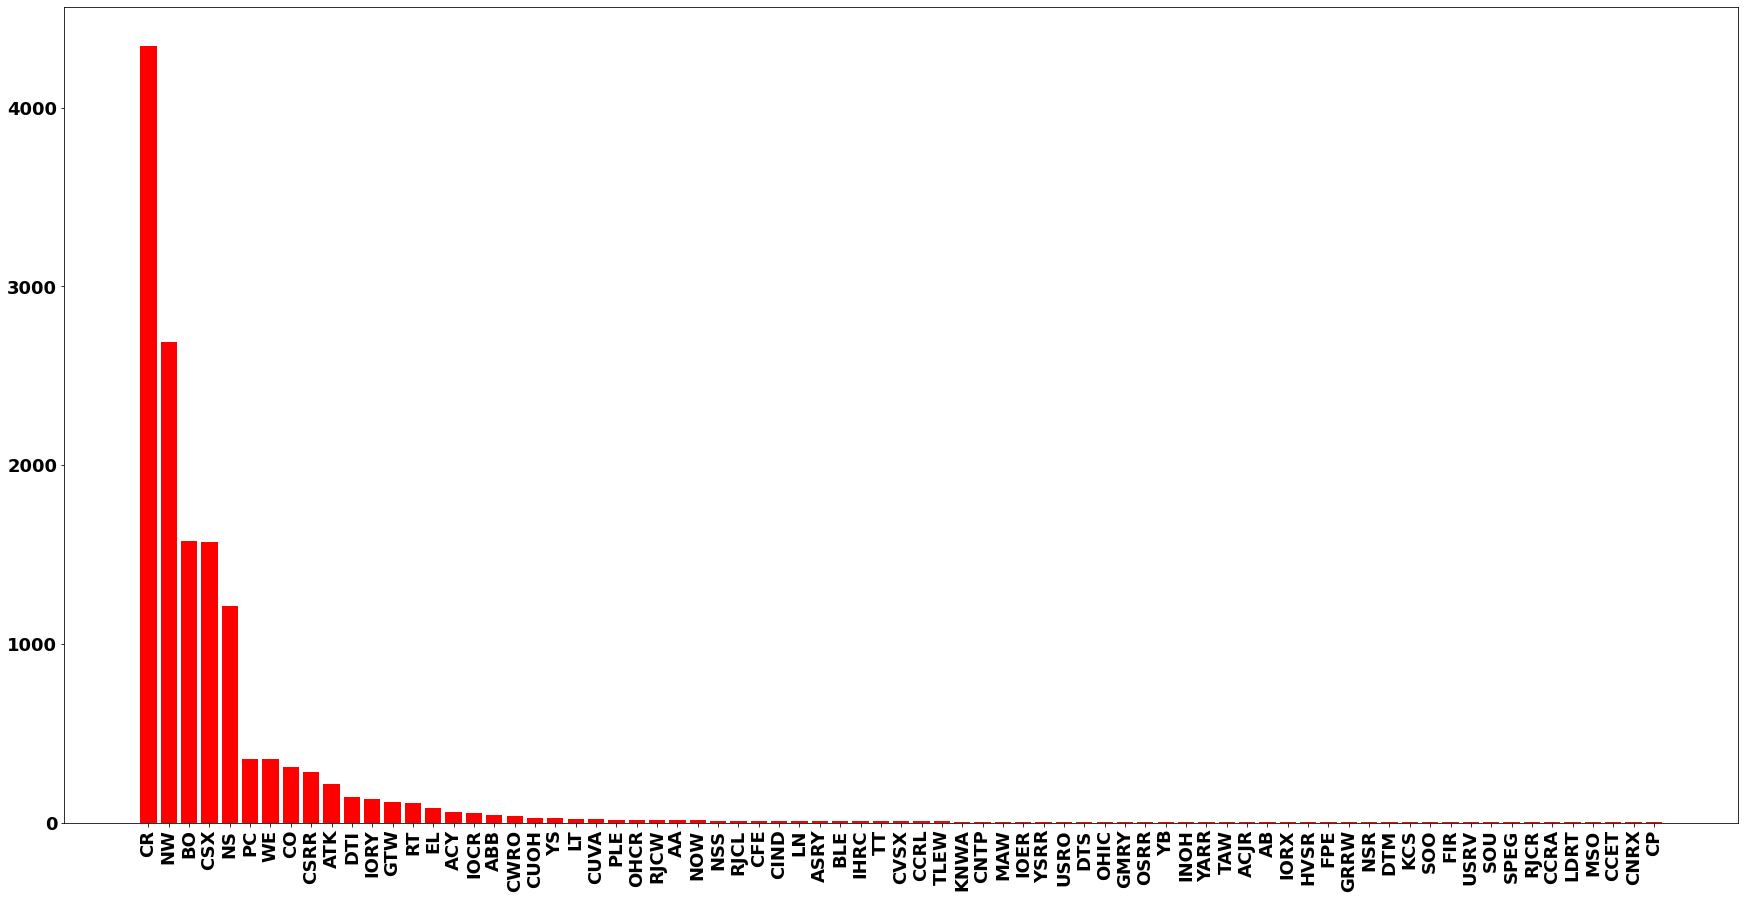

In [52]:
# Plot the Data
plt.xticks(rotation=90)
plt.bar(sorted_dict.keys(), sorted_dict.values(), color="r")

# SQLAlchemy - A More "Pythonic" Approach

Since there are so many versions of databases it can be difficult to move from one type to another. Going from 'in-memory' data manipulation in a programming language like python to 'at-rest' data storage in a file or databse is a common enough task that many libraries have been developed for things like json deserialization to accomplish these goals. One of the more useful libraries in the python language is [SQLAlchemy](https://www.sqlalchemy.org/).

Records in a database can be thought of as Objects in python, with each value in each field representing an attribute of the python object. So for instance, a crossing could have the attributes, `crossing.CrossingID`, `crossing.SubmissionType`, `crossing.ReportBaseID` etc. Writing full SQL statements mapping each python object would be cumbersome, and if you ever want to upgrade from a file database like SQLite to a networked served, multi-user database like PostgreSQL or MongoDB, SQLAlchemy can be used as a transition tool to go from one to the other.

[SQLAlchemy Tutorial](https://docs.sqlalchemy.org/en/20/tutorial/index.html)

### ORM Mapping

In [74]:
from sqlalchemy import *
from sqlalchemy import create_engine, ForeignKey
from sqlalchemy import Column, Date, Integer, String
from sqlalchemy.orm import relationship, backref, declarative_base

engine = create_engine("sqlite:///DRP/DRP.db", echo=True)
Base = declarative_base()


class Student(Base):
    __tablename__ = "student"

    id = Column(Integer, primary_key=True)
    username = Column(String)
    firstname = Column(String)
    lastname = Column(String)
    university = Column(String)

    def __init__(self, username, firstname, lastname, university):
        """"""
        self.username = username
        self.firstname = firstname
        self.lastname = lastname
        self.university = university


# create tables
Base.metadata.create_all(engine)

2024-07-23 09:51:47,200 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-23 09:51:47,201 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("student")
2024-07-23 09:51:47,202 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-23 09:51:47,203 INFO sqlalchemy.engine.Engine COMMIT


In [73]:
import datetime
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

# create a Session
Session = sessionmaker(bind=engine)
session = Session()

# Create a user and add them to the database
Dane_Parks = Student("dj99t", "Dane", "Parks", "Pitt")
session.add(Dane_Parks)
session.commit()

2024-07-23 09:51:30,703 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-23 09:51:30,705 INFO sqlalchemy.engine.Engine INSERT INTO student (username, firstname, lastname, university) VALUES (?, ?, ?, ?)
2024-07-23 09:51:30,706 INFO sqlalchemy.engine.Engine [generated in 0.00084s] ('dj99t', 'Dane', 'Parks', 'Pitt')
2024-07-23 09:51:30,711 INFO sqlalchemy.engine.Engine COMMIT
